![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 4 - Performance Evaluation </center>
### <center> Confusion matrix and cross-validation</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/04_PerformanceEvaluation/MainCrossValidation1.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})
# np.random.seed(1)

### Download MNIST data:

In [2]:
from sklearn.datasets import fetch_openml

mX, vY = fetch_openml('mnist_784', version=1, return_X_y=True)
mX.shape, vY.shape

((70000, 784), (70000,))

### Plot a few examples:

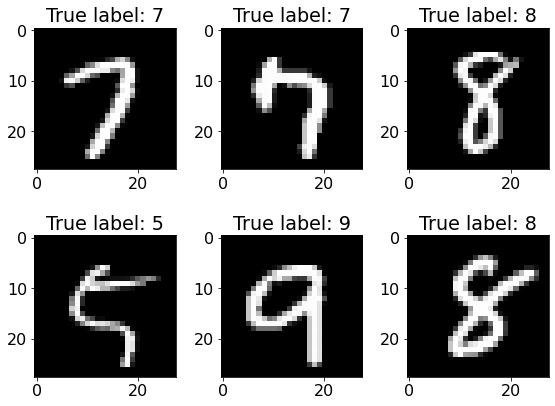

In [3]:
N, d   = mX.shape
fig, _ = plt.subplots(2, 3, figsize=(8,6))
for ax in fig.axes:
    idx = np.random.randint(0, N)
    ax.imshow(np.reshape(mX[idx,:], (28, 28)), cmap='gray')
    ax.set_title('True label: ' + str(vY[idx]))
    
plt.tight_layout()
plt.show()

### Split data to train and validation (test) sets:

In [4]:
Ntrain  = 2000
Ntest   = 1500
vIdx    = np.random.choice(N, Ntrain + Ntest)
mX      = mX[vIdx,:]
vY      = vY[vIdx]

In [6]:
from sklearn.model_selection import train_test_split

mTrainX, mTestX, vTrainY, vTestY = train_test_split(mX, vY, train_size=Ntrain, test_size=Ntest)

(mTrainX.shape, 
vTrainY.shape, 
mTestX.shape,  
vTestY.shape)

((2000, 784), (2000,), (1500, 784), (1500,))

### Train a K-NN classifier ($K=1$):

In [7]:
from sklearn.neighbors import KNeighborsClassifier

KnnClassifier = KNeighborsClassifier(n_neighbors=1).fit(mTrainX, vTrainY)

### Plot confusion matrices:

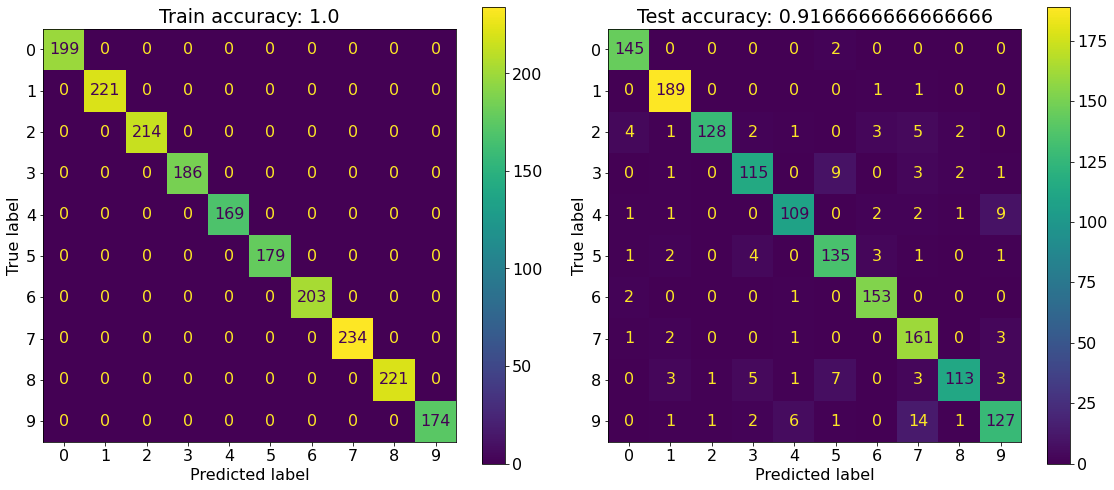

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

vTrainHat       = KnnClassifier.predict(mTrainX)
vTestHat        = KnnClassifier.predict(mTestX)
mTrainConfusion = confusion_matrix(vTrainY, vTrainHat)
mTestConfusion  = confusion_matrix(vTestY,  vTestHat)

_, ax = plt.subplots(1, 2, figsize=(16,7))
ConfusionMatrixDisplay(mTrainConfusion, display_labels=range(10)).plot(values_format='g', ax=ax[0])
ConfusionMatrixDisplay(mTestConfusion,  display_labels=range(10)).plot(values_format='g', ax=ax[1])
ax[0].set_title('Train accuracy: ' + str(np.mean(vTrainY == vTrainHat)))
ax[1].set_title('Test accuracy: '  + str(np.mean(vTestY  == vTestHat)))
plt.tight_layout()
plt.show()

K-NN (with $k=1$) will always provide a perfect __train__ classification accuracy.  
Let us check the cross-validation accuracy (with 10 folds): 

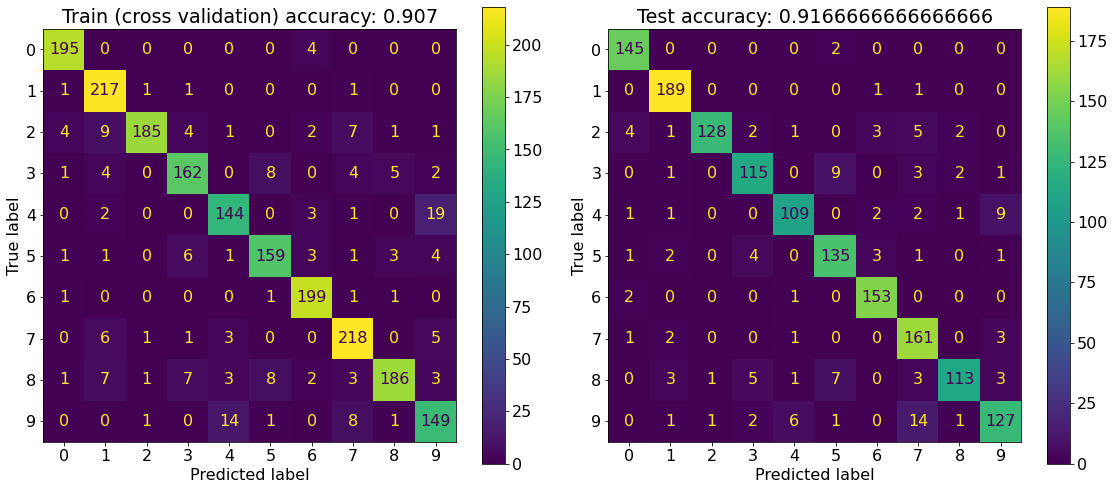

In [9]:
from sklearn.model_selection import cross_val_predict

vTrainCrossVal  = cross_val_predict(KNeighborsClassifier(n_neighbors=1), mTrainX, vTrainY, cv=10)
mTrainConfusion = confusion_matrix(vTrainY, vTrainCrossVal)

_, ax = plt.subplots(1, 2, figsize=(16,7))
ConfusionMatrixDisplay(mTrainConfusion, display_labels=range(10)).plot(values_format='d', ax=ax[0])
ConfusionMatrixDisplay(mTestConfusion,  display_labels=range(10)).plot(values_format='d', ax=ax[1])
ax[0].set_title('Train (cross validation) accuracy: ' + str(np.mean(vTrainY == vTrainCrossVal)))
ax[1].set_title('Test accuracy: '                     + str(np.mean(vTestY  == vTestHat)))
plt.tight_layout()
plt.show()

### Cross validation on $K$:

In [11]:
import pandas as pd
from   sklearn.model_selection import cross_val_score

dRes = pd.DataFrame(columns=['K', 'Accuracy'])

for K in range(1, 12):
    vAccuracy           = cross_val_score(KNeighborsClassifier(n_neighbors=K), mTrainX, vTrainY, cv=10)
    dRes.loc[len(dRes)] = [K, vAccuracy.mean()]

dRes.sort_values(by='Accuracy', ascending=False)

,K,Accuracy
2,3.0,0.9115
6,7.0,0.9105
3,4.0,0.9100
4,5.0,0.9100
5,6.0,0.9095
0,1.0,0.9070
7,8.0,0.9055
8,9.0,0.9050
9,10.0,0.8985
10,11.0,0.8985


### Exercise
* Use the same MNIST data.
* Use a linear SVM classifier.
* Use cross-validation to find a good value of $C$.